In [1]:
pip install -r requirements.txt

In [2]:
# load the dataset
import pandas as pd
df = pd.read_csv('creditcard.csv')

print(df.head())
print(df['Class'].value_counts())  # Imbalance check


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df[['Amount']])
df = df.drop(['Time'], axis=1)

X = df.drop('Class', axis=1)
y = df['Class']


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)


In [6]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train_sm, y_train_sm)


LogisticRegression()

In [8]:
model_rf = RandomForestClassifier(
    n_estimators=10,      # fewer trees
    max_depth=8,          # shallower trees
    n_jobs=-1,            # parallel processing
    random_state=42
)
model_rf.fit(X_train_sm, y_train_sm)



RandomForestClassifier(max_depth=8, n_estimators=10, n_jobs=-1, random_state=42)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)

print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

print("ROC-AUC LR:", roc_auc_score(y_test, y_pred_lr))
print("ROC-AUC RF:", roc_auc_score(y_test, y_pred_rf))



Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.29      0.91      0.44        98

    accuracy                           1.00     56962
   macro avg       0.64      0.95      0.72     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC LR: 0.9459151731880147
ROC-AUC RF: 0.9521383996761339


Matplotlib is building the font cache; this may take a moment.


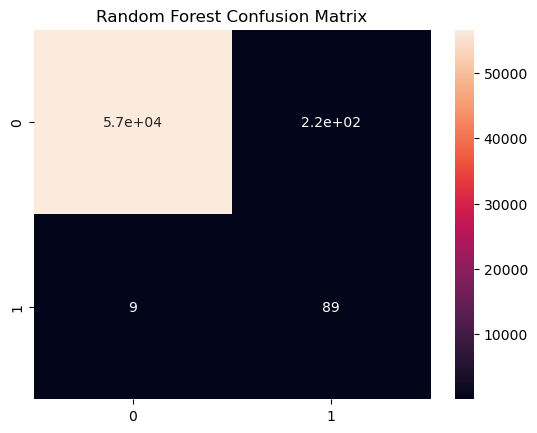

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True)
plt.title("Random Forest Confusion Matrix")
plt.show()
